Gnome heights: [27.49014246 25.5852071  27.94306561 30.56908957 25.29753988 25.29758913
 30.73763845 28.30230419 24.59157684 27.62768013]
Sample mean: 27.344183335096268
Prior 1: mean=20, std=5
Posterior 1: mean=27.08898005318172, std=0.9320546490018
Prior 2: mean=30, std=2
Posterior 2: mean=27.83198639599695, std=0.8571428571428571


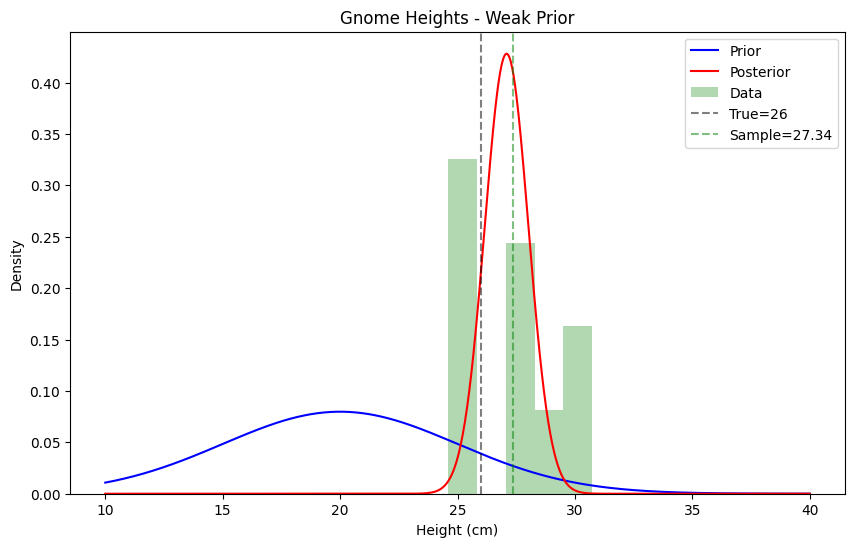

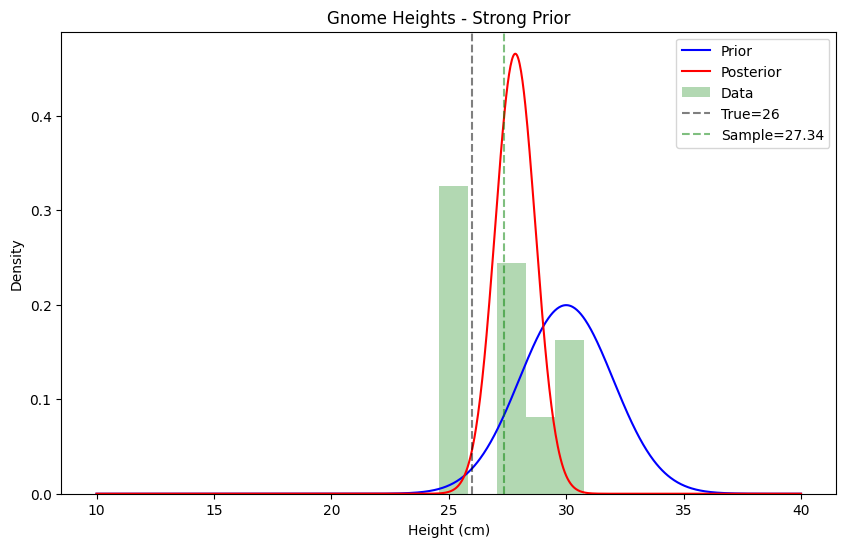

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(42)

true_mean = 26
true_std = 3

n_samples = 10
data = np.random.normal(true_mean, true_std, n_samples)
print(f"Gnome heights: {data}")
print(f"Sample mean: {np.mean(data)}")

mu_0 = 20
sigma_0 = 5
sigma = true_std

def calculate_posterior_params(mu_0, sigma_0, data, sigma):
    n = len(data)
    y_bar = np.mean(data)
    
    posterior_precision = 1/sigma_0**2 + n/sigma**2
    posterior_variance = 1/posterior_precision
    
    posterior_mean = (mu_0/sigma_0**2 + n*y_bar/sigma**2) / posterior_precision
    
    return posterior_mean, np.sqrt(posterior_variance)

post_mean_1, post_std_1 = calculate_posterior_params(mu_0, sigma_0, data, sigma)

print(f"Prior 1: mean={mu_0}, std={sigma_0}")
print(f"Posterior 1: mean={post_mean_1}, std={post_std_1}")

mu_0_2 = 30
sigma_0_2 = 2

post_mean_2, post_std_2 = calculate_posterior_params(mu_0_2, sigma_0_2, data, sigma)

print(f"Prior 2: mean={mu_0_2}, std={sigma_0_2}")
print(f"Posterior 2: mean={post_mean_2}, std={post_std_2}")

def plot_distributions(mu_0, sigma_0, post_mean, post_std, data, title):
    plt.figure(figsize=(10, 6))
    
    x = np.linspace(10, 40, 1000)
    
    prior_pdf = stats.norm.pdf(x, mu_0, sigma_0)
    plt.plot(x, prior_pdf, 'b-', label='Prior')
    
    posterior_pdf = stats.norm.pdf(x, post_mean, post_std)
    plt.plot(x, posterior_pdf, 'r-', label='Posterior')
    
    plt.hist(data, bins=5, density=True, alpha=0.3, label='Data', color='green')
    
    plt.axvline(x=true_mean, color='k', linestyle='--', alpha=0.5, label=f'True={true_mean}')
    plt.axvline(x=np.mean(data), color='g', linestyle='--', alpha=0.5, label=f'Sample={np.mean(data):.2f}')
    
    plt.title(title)
    plt.xlabel('Height (cm)')
    plt.ylabel('Density')
    plt.legend()
    
    return plt

p1 = plot_distributions(mu_0, sigma_0, post_mean_1, post_std_1, data, 'Gnome Heights - Weak Prior')
p2 = plot_distributions(mu_0_2, sigma_0_2, post_mean_2, post_std_2, data, 'Gnome Heights - Strong Prior')

plt.show()